## Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

from lung_cancer_detection.data.nodule import ClassificationDataModule
from lung_cancer_detection.utils import load_config, load_json

In [3]:
config_path = Path().absolute().parents[0] / "configs/test.yaml"
config_path.exists()

True

In [4]:
config = load_config(config_path)
data_dir = Path().absolute().parents[0] / config["data"]["data_dir"]
split_dir = Path().absolute().parents[0] / config["data"]["split_dir"]
cache_dir = Path().absolute().parents[0] / config["data"]["cache_dir"]

In [5]:
splits = (load_json(split_dir/"train.json"), load_json(split_dir/"valid.json"))

## Helper functions

In [6]:
def print_shapes(dataset):
    for item in dataset:
        print(item["image"].shape, item["label"].shape)

In [7]:
def preview_dataset(ds, z=None):
    plt.figure("nodules", (12, 12))
    for i, item in enumerate(ds[:20], start=1):
        img = item["image"].numpy()[0]
        plt.subplot(4, 5, i)
        if z:
            plt.imshow(img[:,:,z], cmap="gray")
        else:
            plt.imshow(img[:,:,int(img.shape[2]/2)], cmap="gray")
        plt.title(f"Label: {item['label'].numpy()[0]}")
    plt.show()

## Inititalize DataModule

In [8]:
dm = ClassificationDataModule(data_dir, cache_dir, splits, batch_size=4)

In [9]:
dm.setup()

In [10]:
dm.train_dicts

[{'image': 'nodules/LIDC-IDRI-0144_0.npy', 'label': 2},
 {'image': 'nodules/LIDC-IDRI-0144_1.npy', 'label': 3},
 {'image': 'nodules/LIDC-IDRI-0144_2.npy', 'label': 1},
 {'image': 'nodules/LIDC-IDRI-0144_3.npy', 'label': 2},
 {'image': 'nodules/LIDC-IDRI-0144_4.npy', 'label': 4},
 {'image': 'nodules/LIDC-IDRI-0379_0.npy', 'label': 3},
 {'image': 'nodules/LIDC-IDRI-0379_1.npy', 'label': 2},
 {'image': 'nodules/LIDC-IDRI-0379_2.npy', 'label': 1},
 {'image': 'nodules/LIDC-IDRI-0379_3.npy', 'label': 3},
 {'image': 'nodules/LIDC-IDRI-0379_4.npy', 'label': 3},
 {'image': 'nodules/LIDC-IDRI-0055_0.npy', 'label': 4},
 {'image': 'nodules/LIDC-IDRI-0055_1.npy', 'label': 4},
 {'image': 'nodules/LIDC-IDRI-0055_2.npy', 'label': 3},
 {'image': 'nodules/LIDC-IDRI-0055_3.npy', 'label': 3},
 {'image': 'nodules/LIDC-IDRI-0055_4.npy', 'label': 5},
 {'image': 'nodules/LIDC-IDRI-0055_5.npy', 'label': 3},
 {'image': 'nodules/LIDC-IDRI-0055_6.npy', 'label': 3},
 {'image': 'nodules/LIDC-IDRI-0001_0.npy', 'labe

In [11]:
dm.val_dicts

[{'image': 'nodules/LIDC-IDRI-0447_0.npy', 'label': 3},
 {'image': 'nodules/LIDC-IDRI-0447_1.npy', 'label': 5},
 {'image': 'nodules/LIDC-IDRI-0447_2.npy', 'label': 1},
 {'image': 'nodules/LIDC-IDRI-0447_3.npy', 'label': 2},
 {'image': 'nodules/LIDC-IDRI-0447_4.npy', 'label': 2}]

In [12]:
print_shapes(dm.train_ds)

torch.Size([1, 50, 50, 30]) torch.Size([1])
torch.Size([1, 50, 50, 30]) torch.Size([1])
torch.Size([1, 50, 50, 30]) torch.Size([1])
torch.Size([1, 50, 50, 30]) torch.Size([1])
torch.Size([1, 50, 50, 30]) torch.Size([1])
torch.Size([1, 49, 49, 30]) torch.Size([1])
torch.Size([1, 49, 49, 30]) torch.Size([1])
torch.Size([1, 49, 49, 30]) torch.Size([1])
torch.Size([1, 49, 49, 30]) torch.Size([1])
torch.Size([1, 49, 49, 30]) torch.Size([1])
torch.Size([1, 47, 47, 30]) torch.Size([1])
torch.Size([1, 47, 47, 30]) torch.Size([1])
torch.Size([1, 47, 47, 30]) torch.Size([1])
torch.Size([1, 47, 47, 30]) torch.Size([1])
torch.Size([1, 47, 47, 30]) torch.Size([1])
torch.Size([1, 47, 47, 30]) torch.Size([1])
torch.Size([1, 47, 47, 30]) torch.Size([1])
torch.Size([1, 47, 47, 30]) torch.Size([1])
torch.Size([1, 47, 47, 30]) torch.Size([1])
torch.Size([1, 40, 40, 30]) torch.Size([1])


## Test transformations on separate dataset

In [13]:
from lung_cancer_detection.data.image_reader import LIDCReader

In [14]:
import matplotlib.pyplot as plt

In [15]:
from monai.data import Dataset, PersistentDataset, list_data_collate
from monai.transforms import (AddChanneld, CenterSpatialCropd, Compose, LoadImaged, ScaleIntensityd, Spacingd, ToTensord, SpatialPadd)

In [16]:
reader = LIDCReader(data_dir, nodule_mode=True)

### Loading images

In [17]:
tfs = Compose([
    LoadImaged(keys=["image"], reader=reader),
    AddChanneld(keys=["image"]),
    ToTensord(keys=["image", "label"]),
])
ds = Dataset(dm.train_dicts, transform=tfs)

In [18]:
print_shapes(ds)

torch.Size([1, 100, 100, 53]) torch.Size([1])
torch.Size([1, 100, 100, 54]) torch.Size([1])
torch.Size([1, 100, 100, 60]) torch.Size([1])
torch.Size([1, 100, 100, 60]) torch.Size([1])
torch.Size([1, 100, 100, 60]) torch.Size([1])
torch.Size([1, 100, 100, 60]) torch.Size([1])
torch.Size([1, 100, 100, 60]) torch.Size([1])
torch.Size([1, 100, 100, 60]) torch.Size([1])
torch.Size([1, 100, 100, 60]) torch.Size([1])
torch.Size([1, 100, 100, 60]) torch.Size([1])
torch.Size([1, 100, 100, 60]) torch.Size([1])
torch.Size([1, 100, 100, 60]) torch.Size([1])
torch.Size([1, 100, 100, 60]) torch.Size([1])
torch.Size([1, 100, 100, 60]) torch.Size([1])
torch.Size([1, 100, 100, 48]) torch.Size([1])
torch.Size([1, 100, 100, 47]) torch.Size([1])
torch.Size([1, 100, 100, 46]) torch.Size([1])
torch.Size([1, 100, 100, 60]) torch.Size([1])
torch.Size([1, 100, 100, 49]) torch.Size([1])
torch.Size([1, 100, 100, 60]) torch.Size([1])


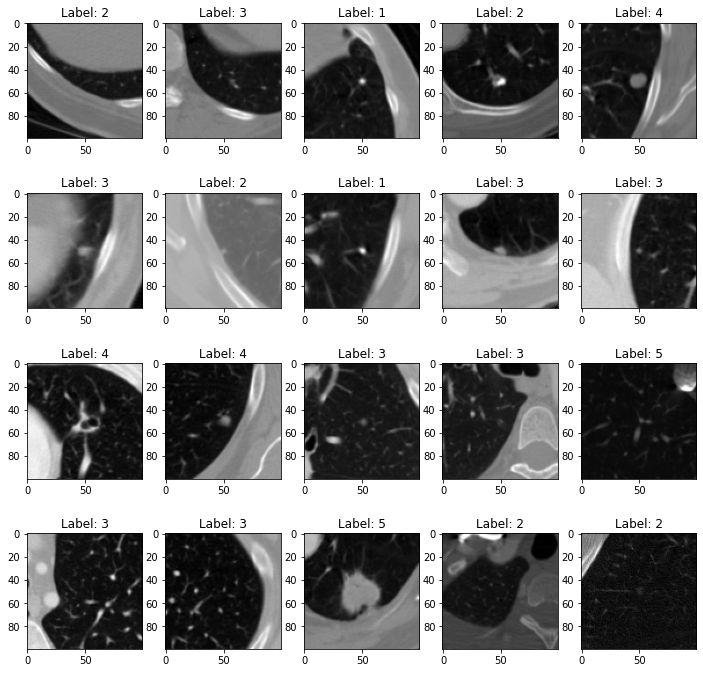

In [19]:
preview_dataset(ds)

### Adjusting spacing

In [20]:
tfs = Compose([
    LoadImaged(keys=["image"], reader=reader),
    AddChanneld(keys=["image"]),
    Spacingd(keys=["image"], pixdim=[1.5, 1.5, 2.0], mode="bilinear"),
    ToTensord(keys=["image", "label"]),
])
ds = Dataset(dm.train_dicts, transform=tfs)

In [21]:
print_shapes(ds)

torch.Size([1, 50, 50, 66]) torch.Size([1])
torch.Size([1, 50, 50, 67]) torch.Size([1])
torch.Size([1, 50, 50, 75]) torch.Size([1])
torch.Size([1, 50, 50, 75]) torch.Size([1])
torch.Size([1, 50, 50, 75]) torch.Size([1])
torch.Size([1, 49, 49, 90]) torch.Size([1])
torch.Size([1, 49, 49, 90]) torch.Size([1])
torch.Size([1, 49, 49, 90]) torch.Size([1])
torch.Size([1, 49, 49, 90]) torch.Size([1])
torch.Size([1, 49, 49, 90]) torch.Size([1])
torch.Size([1, 47, 47, 75]) torch.Size([1])
torch.Size([1, 47, 47, 75]) torch.Size([1])
torch.Size([1, 47, 47, 75]) torch.Size([1])
torch.Size([1, 47, 47, 75]) torch.Size([1])
torch.Size([1, 47, 47, 60]) torch.Size([1])
torch.Size([1, 47, 47, 58]) torch.Size([1])
torch.Size([1, 47, 47, 57]) torch.Size([1])
torch.Size([1, 47, 47, 75]) torch.Size([1])
torch.Size([1, 47, 47, 31]) torch.Size([1])
torch.Size([1, 40, 40, 75]) torch.Size([1])


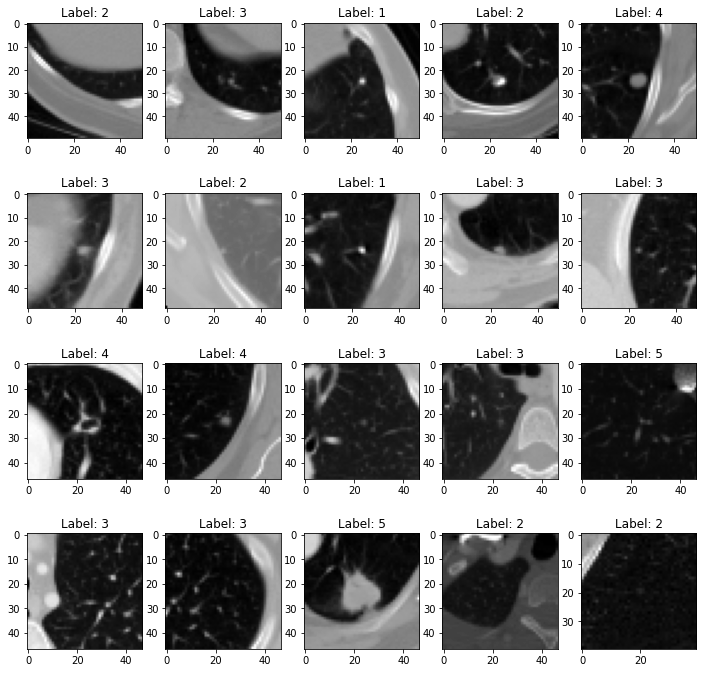

In [22]:
preview_dataset(ds)

### Scaling intensity

In [23]:
tfs = Compose([
    LoadImaged(keys=["image"], reader=reader),
    AddChanneld(keys=["image"]),
    Spacingd(keys=["image"], pixdim=[1.5, 1.5, 2.0], mode="bilinear"),
    ScaleIntensityd(keys="image"),
    ToTensord(keys=["image", "label"]),
])
ds = Dataset(dm.train_dicts, transform=tfs)

In [24]:
print_shapes(ds)

torch.Size([1, 50, 50, 66]) torch.Size([1])
torch.Size([1, 50, 50, 67]) torch.Size([1])
torch.Size([1, 50, 50, 75]) torch.Size([1])
torch.Size([1, 50, 50, 75]) torch.Size([1])
torch.Size([1, 50, 50, 75]) torch.Size([1])
torch.Size([1, 49, 49, 90]) torch.Size([1])
torch.Size([1, 49, 49, 90]) torch.Size([1])
torch.Size([1, 49, 49, 90]) torch.Size([1])
torch.Size([1, 49, 49, 90]) torch.Size([1])
torch.Size([1, 49, 49, 90]) torch.Size([1])
torch.Size([1, 47, 47, 75]) torch.Size([1])
torch.Size([1, 47, 47, 75]) torch.Size([1])
torch.Size([1, 47, 47, 75]) torch.Size([1])
torch.Size([1, 47, 47, 75]) torch.Size([1])
torch.Size([1, 47, 47, 60]) torch.Size([1])
torch.Size([1, 47, 47, 58]) torch.Size([1])
torch.Size([1, 47, 47, 57]) torch.Size([1])
torch.Size([1, 47, 47, 75]) torch.Size([1])
torch.Size([1, 47, 47, 31]) torch.Size([1])
torch.Size([1, 40, 40, 75]) torch.Size([1])


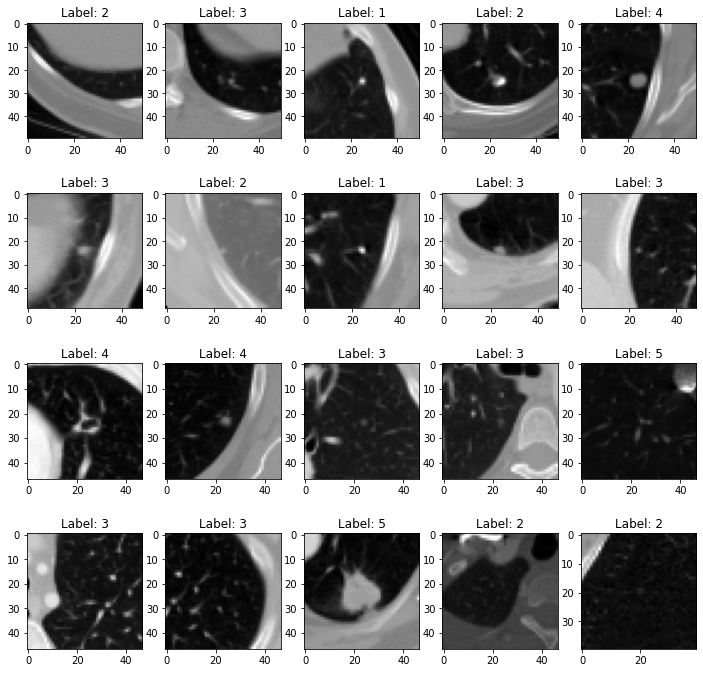

In [25]:
preview_dataset(ds)

### Cropping image

In [26]:
tfs = Compose([
    LoadImaged(keys=["image"], reader=reader),
    AddChanneld(keys=["image"]),
    Spacingd(keys=["image"], pixdim=[1.5, 1.5, 2.0], mode="bilinear"),
    ScaleIntensityd(keys="image"),
    CenterSpatialCropd(keys=["image"], roi_size=[40, 40, 30]),
    ToTensord(keys=["image", "label"]),
])
ds = Dataset(dm.train_dicts, transform=tfs)

In [27]:
print_shapes(ds)

torch.Size([1, 40, 40, 30]) torch.Size([1])
torch.Size([1, 40, 40, 30]) torch.Size([1])
torch.Size([1, 40, 40, 30]) torch.Size([1])
torch.Size([1, 40, 40, 30]) torch.Size([1])
torch.Size([1, 40, 40, 30]) torch.Size([1])
torch.Size([1, 40, 40, 30]) torch.Size([1])
torch.Size([1, 40, 40, 30]) torch.Size([1])
torch.Size([1, 40, 40, 30]) torch.Size([1])
torch.Size([1, 40, 40, 30]) torch.Size([1])
torch.Size([1, 40, 40, 30]) torch.Size([1])
torch.Size([1, 40, 40, 30]) torch.Size([1])
torch.Size([1, 40, 40, 30]) torch.Size([1])
torch.Size([1, 40, 40, 30]) torch.Size([1])
torch.Size([1, 40, 40, 30]) torch.Size([1])
torch.Size([1, 40, 40, 30]) torch.Size([1])
torch.Size([1, 40, 40, 30]) torch.Size([1])
torch.Size([1, 40, 40, 30]) torch.Size([1])
torch.Size([1, 40, 40, 30]) torch.Size([1])
torch.Size([1, 40, 40, 30]) torch.Size([1])
torch.Size([1, 40, 40, 30]) torch.Size([1])


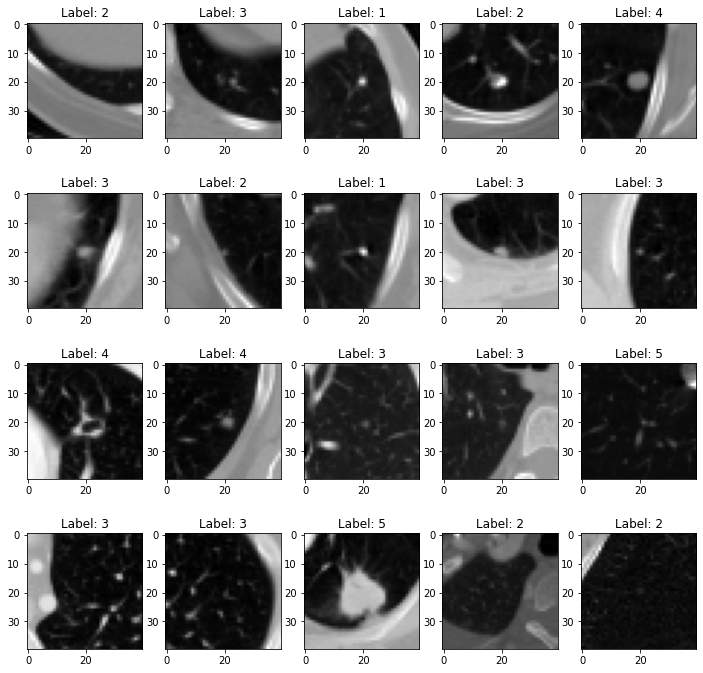

In [28]:
preview_dataset(ds)

### Padding before cropping

In [29]:
tfs = Compose([
    LoadImaged(keys=["image"], reader=reader),
    AddChanneld(keys=["image"]),
    Spacingd(keys=["image"], pixdim=[1.5, 1.5, 2.0], mode="bilinear"),
    ScaleIntensityd(keys="image"),
    SpatialPadd(keys=["image"], spatial_size=[60, 60, 30], mode="constant"),
    CenterSpatialCropd(keys=["image"], roi_size=[60, 60, 30]),
    ToTensord(keys=["image", "label"]),
])
ds = Dataset(dm.train_dicts, transform=tfs)

In [30]:
print_shapes(ds)

torch.Size([1, 60, 60, 30]) torch.Size([1])
torch.Size([1, 60, 60, 30]) torch.Size([1])
torch.Size([1, 60, 60, 30]) torch.Size([1])
torch.Size([1, 60, 60, 30]) torch.Size([1])
torch.Size([1, 60, 60, 30]) torch.Size([1])
torch.Size([1, 60, 60, 30]) torch.Size([1])
torch.Size([1, 60, 60, 30]) torch.Size([1])
torch.Size([1, 60, 60, 30]) torch.Size([1])
torch.Size([1, 60, 60, 30]) torch.Size([1])
torch.Size([1, 60, 60, 30]) torch.Size([1])
torch.Size([1, 60, 60, 30]) torch.Size([1])
torch.Size([1, 60, 60, 30]) torch.Size([1])
torch.Size([1, 60, 60, 30]) torch.Size([1])
torch.Size([1, 60, 60, 30]) torch.Size([1])
torch.Size([1, 60, 60, 30]) torch.Size([1])
torch.Size([1, 60, 60, 30]) torch.Size([1])
torch.Size([1, 60, 60, 30]) torch.Size([1])
torch.Size([1, 60, 60, 30]) torch.Size([1])
torch.Size([1, 60, 60, 30]) torch.Size([1])
torch.Size([1, 60, 60, 30]) torch.Size([1])


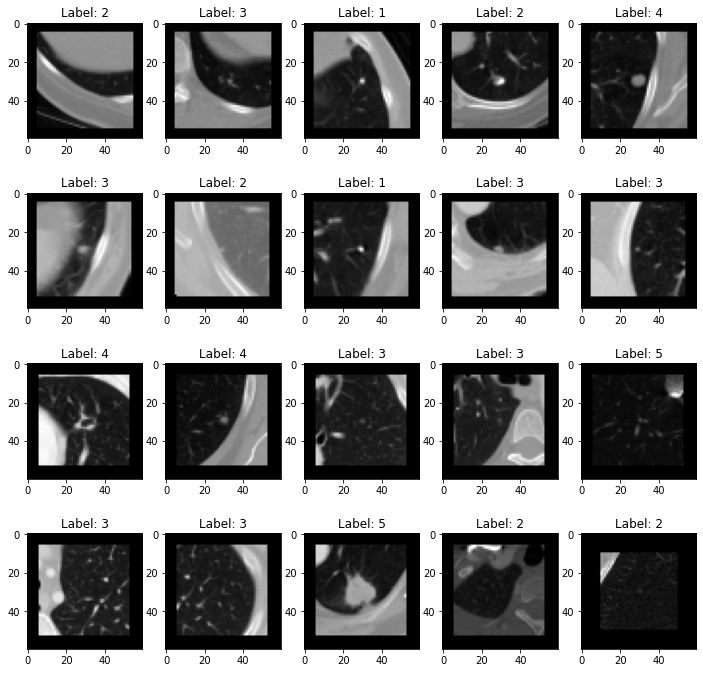

In [31]:
preview_dataset(ds)